## Ejercicios individuales reconocimiento facial
1. Crea una aplicacion que ponga gafas, nariz de payaso y bigote a una imagen 
2. Crea una aplicacion que identifique a alguien enfrente de la webcam y le ponga un recuadro alrededor de la cara. 
3. Podrias incluirle gafas y bigote a la imagen de la webcam?
4. Podrias identificar si es de nuestro curso o no. Podrias incluir tambien alguna otra informaicion (edad, sexo, estado de animo ... etc)

 2. Crea una aplicacion que identifique a alguien enfrente de la webcam y le ponga un recuadro alrededor de la cara. 

In [3]:
""" para el hardcascade
def mostrar_caras(imagen, caras, eyes=[]): # Metemos una imagen y la lista de caras
    for (x, y, w, h) in caras: # Posicion x, posicion y , anchura y altura 
        cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,0,0), 5)
    for (x, y, w, h) in eyes: # Posicion x, posicion y , anchura y altura 
        cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,255,0), 5)
    return imagen
"""

def print_boxes_mtcnn(imagen, results_mtcnn, gafa):
    #print("[INFO] Detected {} faces".format(len(results_mtcnn)))
    
    black_image= np.zeros(shape = imagen.shape, dtype =np.uint8)
    for element in results_mtcnn:
        
        # LO ADAPTAMOS PARA PONERLE SOLO GAFAS: 
        # Box
        x , y, w, h = element['box']# Box
        cv2.rectangle(imagen, (x,y), (x+w, y+h), (255,0,0), 5)
        
        # eyes 
        x_l, y_l = element['keypoints']['left_eye']
        #cv2.circle(imagen,(x_e,y_e),50,(255,255,0))
        x_r, y_r = element['keypoints']['right_eye']
        
        
        # Gafa: Cambiamos primero sus dimensiones
        factor_escala = float(1.5*abs(x_r - x_l)) / gafa.shape[1] # x es gafa.shape[1] # Para adaptar la gafa a los ojos, el 1.5 es para aumentarla un poquito
        gafa = cv2.resize(gafa, (int(factor_escala *gafa.shape[1]) , int(factor_escala *gafa.shape[0]) ) )
        # Gafa: La superponemos: 
        new_image = black_image.copy()
        y_min = int((y_l+y_r)/2-gafa.shape[0]/2)
        x_l = int(x_l - 0.25*abs(x_r - x_l))
        new_image[y_min:y_min+gafa.shape[0],x_l:x_l+gafa.shape[1],:] = gafa[:,:,:]
        
        imagen = cv2.add(imagen, new_image)
        # cv2.circle(imagen,(x_e,y_e),50,(255,255,0))
        # mouth
        # x_m, y_m = element['keypoints']['mouth_right']
        # cv2.circle(imagen,(x_m,y_m),50,(255,0,255))
        # x_m, y_m = element['keypoints']['mouth_left']
        # cv2.circle(imagen,(x_m,y_m),50,(255,0,255))
        # nose
        # x_n, y_n = element['keypoints']['nose']
        # cv2.circle(imagen,(x_n,y_n),50,(0,255,255))
        
    return imagen

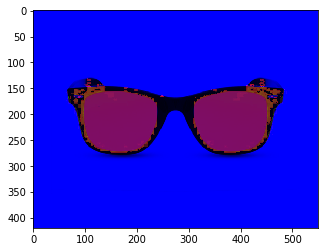

InvalidImage: Image not valid.

In [5]:
import numpy as np
import cv2
from mtcnn.mtcnn import MTCNN #RED CONVOLUCIONAL DE TRATAMIENTO DE IMAGENES YA ENTRENADA
import matplotlib.pyplot as plt

detector = MTCNN() # Para las caras 2
gafa = cv2.imread("gafas.jpg") # Gafa

#plt.imshow(gafa)
#plt.show()
#vamos a quitar lo blanco de la gafa: 


# Transformar el color de BGR a HSV
# Transformar la imagen a HSV
img_HSV = cv2.cvtColor( gafa, cv2.COLOR_BGR2HSV)
plt.imshow(img_HSV)
plt.show()

 # Definimos el rango: 
lower = np.array([0,0,0]) #Blanco
upper = np.array([255,255, 200]) # [74,255,249]
# Lanzar el thresholding para generar el map que se va a filtrar
mask = cv2.inRange(img_HSV, lower, upper)

gafaPuesta = cv2.bitwise_and(gafa,gafa, mask =mask )

cap = cv2.VideoCapture(0)
""" cOMO ESTE CLASIFICADOR NO ES MUY BUENO USAMOS EL MTCNN
cas_alt2 = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml") # Cogemos el hard clasifier #Cara
"""
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Cara
    
    #faces_alt2 = cas_alt2.detectMultiScale(gray) #Cara 
    faces = detector.detect_faces(frame) #caras 2
    
    #frame = mostrar_caras(frame, faces_alt2) #Cara
    frame = print_boxes_mtcnn(frame, faces, gafaPuesta)
    
    # Display the resulting frame
    cv2. imshow('frame', frame) #Caraa
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()